# Materiais extrusados - Técnicas de Machine Learning

### Métodos:

* Regressão Linear
* Regressão Logistica
* SVM
* KNN (Classificação e Regressão)
* RandomForest (Classificação e Regressão)
* DecisionTree (Classificação e Regressão)
* Redes Neurais (Classificação e Regressão)

In [1]:
!python --version

Python 3.8.3


In [2]:
import tensorflow as tf
print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available 0


In [3]:
# Importando as bibliotecas (pandas, numpy, matplotlib e seaborn, StandardScaler e train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report ,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

In [4]:
#importando o arquivo de dados
base_extrusao = 'dados_analise.xlsx'
df = pd.read_excel(base_extrusao)

In [5]:
#Avaliando e verificando os dados
df.head()

,N° CAMADAS,FILME,µm,Item de Linha,Cor,Máquina,Centro de Trabalho,VELOCIDADE (Kg/Hora),Setup (hora),Perda (%)
0,7,Material 01,180,1,Cor 01,Máquina 01,Centro 01,500,0.362,3.25
1,7,Material 01,200,1,Cor 01,Máquina 01,Centro 01,500,0.362,3.25
2,7,Material 01,220,1,Cor 01,Máquina 01,Centro 01,500,0.362,3.25
3,7,Material 01,250,1,Cor 01,Máquina 01,Centro 01,500,0.362,3.25
4,7,Material 01,100,1,Cor 01,Máquina 01,Centro 01,500,0.362,3.25


# Análise de dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N° CAMADAS            756 non-null    int64  
 1   FILME                 756 non-null    object 
 2   µm                    756 non-null    int64  
 3   Item de Linha         756 non-null    int64  
 4   Cor                   756 non-null    object 
 5   Máquina               756 non-null    object 
 6   Centro de Trabalho    756 non-null    object 
 7   VELOCIDADE (Kg/Hora)  756 non-null    int64  
 8   Setup (hora)          756 non-null    float64
 9   Perda (%)             756 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 59.2+ KB


In [7]:
df.describe()

,N° CAMADAS,µm,Item de Linha,VELOCIDADE (Kg/Hora),Setup (hora),Perda (%)
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,5.671958,97.026455,0.529101,402.962963,0.249061,3.813439
std,2.488289,50.381636,0.499483,64.009136,0.055356,2.564310
min,3.000000,14.000000,0.000000,290.000000,0.197000,2.690000
25%,3.000000,65.000000,0.000000,350.000000,0.197000,2.780000
50%,7.000000,87.000000,1.000000,400.000000,0.251000,2.780000
75%,7.000000,119.250000,1.000000,442.500000,0.292000,3.250000
max,9.000000,308.000000,1.000000,500.000000,0.362000,13.080000


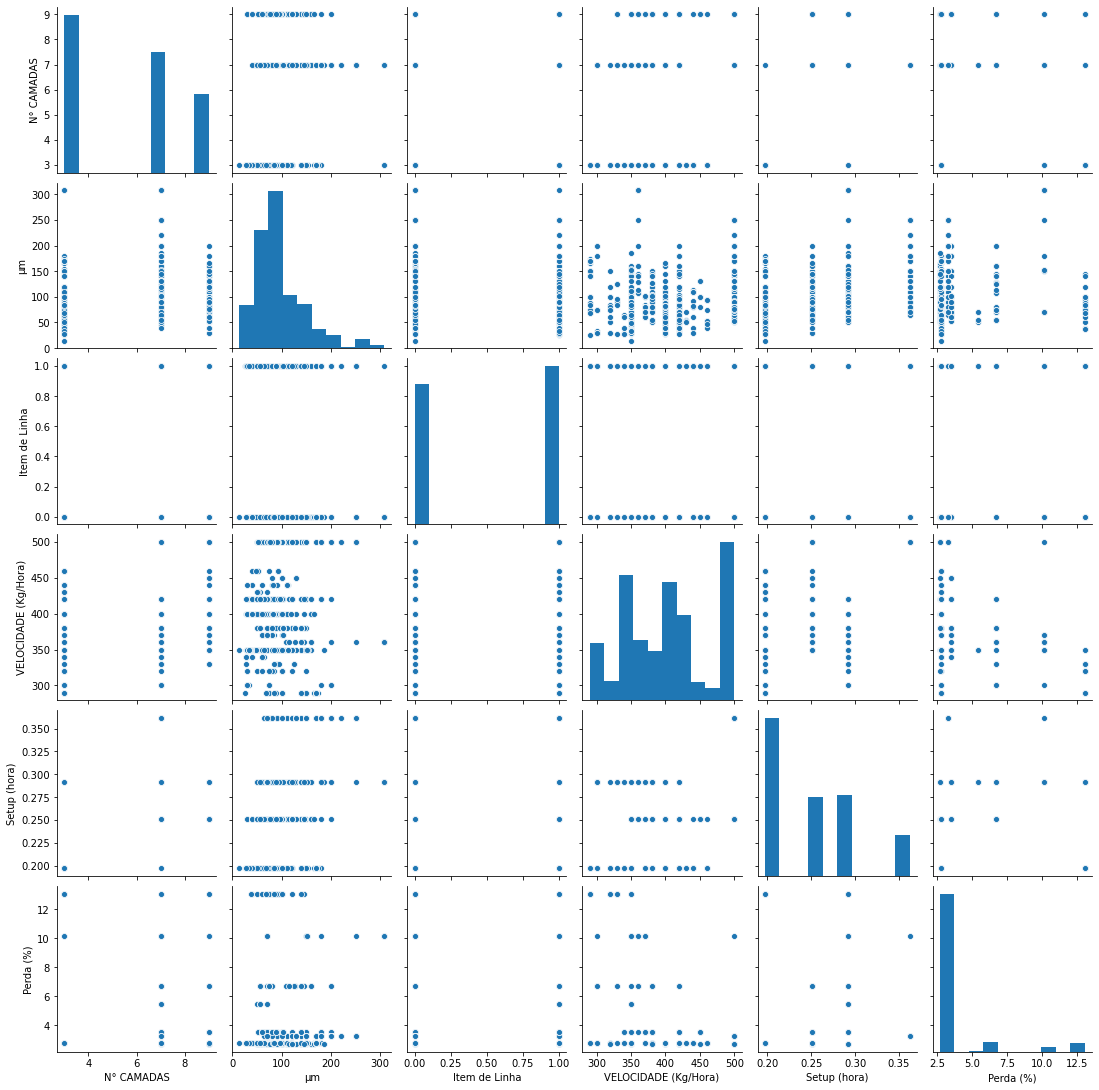

In [8]:
sns.pairplot(df)

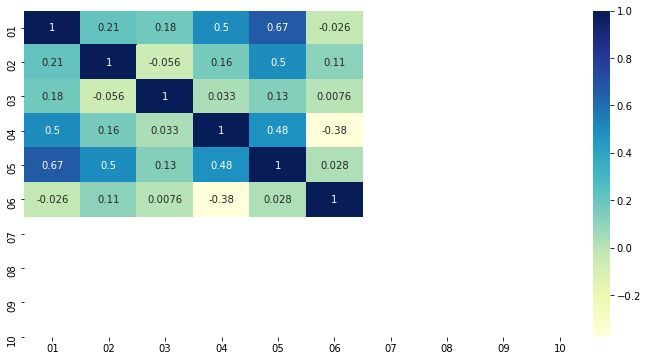

In [9]:
plt.figure(figsize=(12,6))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True, yticklabels=["01", "02", "03", "04", "05", "06", "07", "08",  "09", "10"], xticklabels=["01", "02", "03", "04", "05", "06", "07", "08",  "09", "10"])
plt.savefig('Imagens\Heatmap das informações.png', format='png')
#

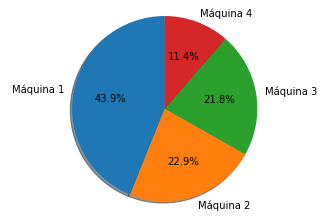

In [10]:
maquina = df['Máquina'].value_counts()
legenda = ['Máquina 1', 'Máquina 2', 'Máquina 3', 'Máquina 4']

#Criação do Gráfico
plt.pie(maquina, labels=legenda, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.legend().remove()
plt.savefig('Imagens\Percentual de Filmes por Máquina.png', format='png')
plt.show()

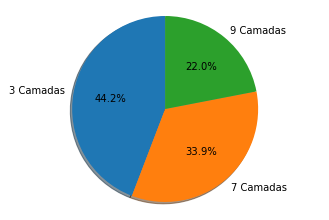

In [11]:
camada = df['N° CAMADAS'].value_counts()
legenda = ['3 Camadas', '7 Camadas', '9 Camadas']

#Criação do Gráfico
plt.pie(camada, labels=legenda, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.legend().remove()
plt.savefig('Imagens\Percentual de Filmes por Camadas.png', format='png')
plt.show()

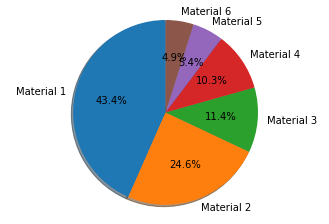

In [12]:
material = df['FILME'].value_counts()
legenda = ['Material 1', 'Material 2', 'Material 3', 'Material 4', 'Material 5', 'Material 6']

#Criação do Gráfico
plt.pie(material, labels=legenda, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(legenda, bbox_to_anchor=(1.3, 1.3), loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.legend().remove()
plt.savefig('Imagens\Percentual de Filmes por Material.png', format='png')
plt.show()

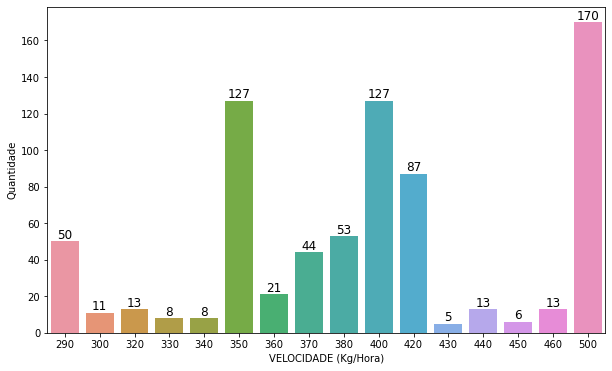

In [13]:
velocidade = df['VELOCIDADE (Kg/Hora)']
fig, ax = plt.subplots(figsize = ( 10 , 6 )) 
sns.countplot(velocidade)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_ylabel("Quantidade")
plt.savefig("Imagens\Contagem de Velocidade.png")

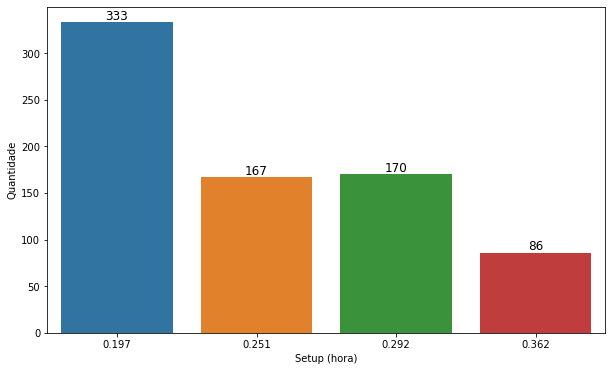

In [29]:
setup = df['Setup (hora)']
fig, ax = plt.subplots(figsize = ( 10 , 6 )) 
sns.countplot(setup)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
ax.set_ylabel("Quantidade")
plt.savefig("Imagens\Contagem de Setup.png")

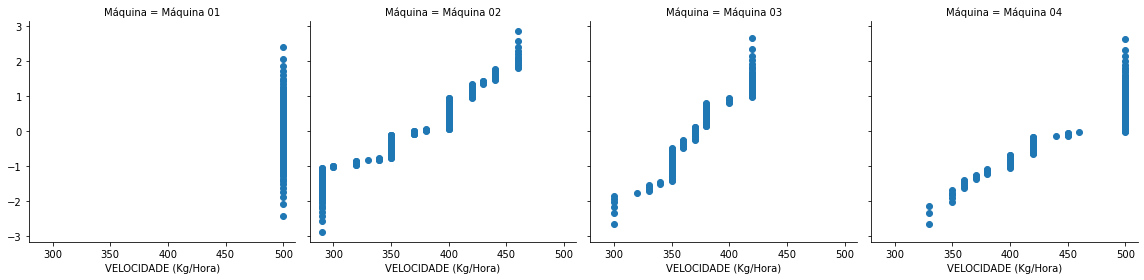

In [15]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(df, col="Máquina", height=4)
g.map(quantile_plot, "VELOCIDADE (Kg/Hora)")
plt.savefig("Imagens\Distribuição de velocidades.png")

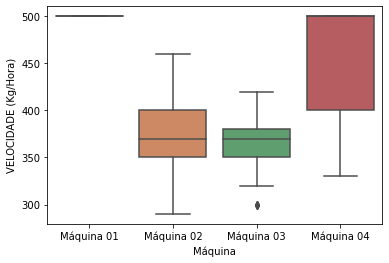

In [16]:
g = sns.boxplot(x="Máquina", y="VELOCIDADE (Kg/Hora)", data=df, palette="deep")
plt.savefig("Imagens\Distribuição de velocidades.png")

AttributeError: 'Series' object has no attribute 'count_values'

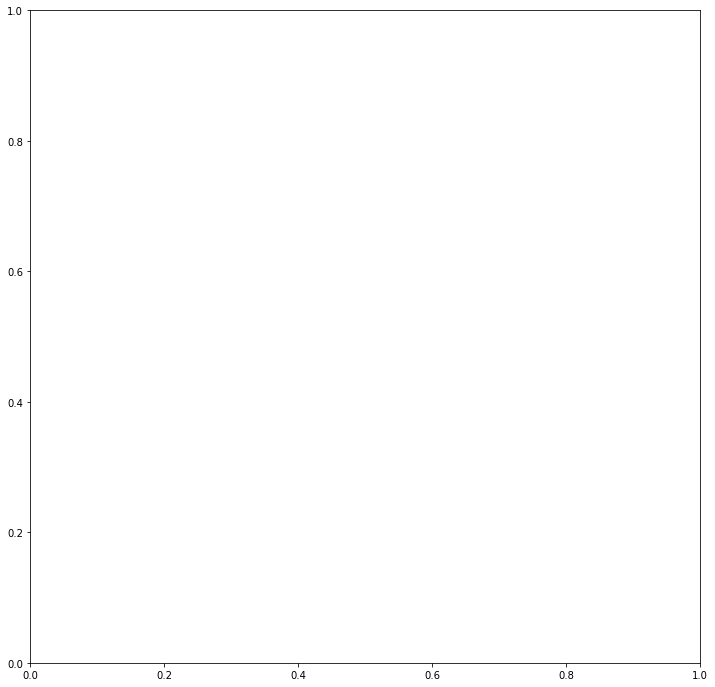

In [35]:
width = 0.1
x = np.arange(len(df))

fig, ax = plt.subplots(figsize=(12,12))
maq1 = ax.bar(x - width*2, df.Máquina.count_values, width=width, label='K-means', align='center')
maq2 = ax.bar(x - width, count_kmedoids, width=width, label='K-medoids', align='center')
maq3 = ax.bar(x + width, count_hierarquico, width=width, label='Hierarquico', align='center')
maq4 = ax.bar(x + width*2, count_kmeans, width=width, label='K-means', align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('Comparativo de diâmetros entre algoritmos')
ax.set_xticks(x)
ax.set_xticklabels(diameters)
ax.set_xlabel('Diâmetro nominal (mm)')
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

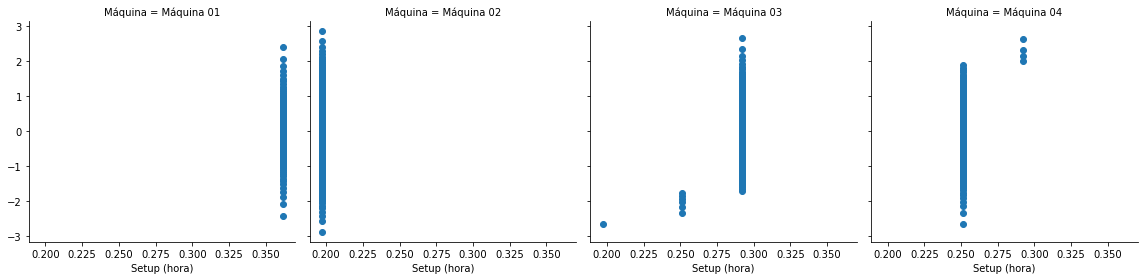

In [17]:
from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

g = sns.FacetGrid(df, col="Máquina", height=4)
g.map(quantile_plot, "Setup (hora)")
plt.savefig("Imagens\Distribuição de setups.png")

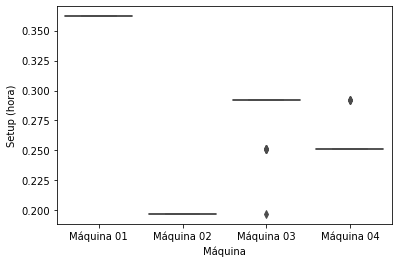

In [18]:
g = sns.boxplot(x="Máquina", y="Setup (hora)", data=df, palette="deep")
plt.savefig("Imagens\Distribuição de setups.png")

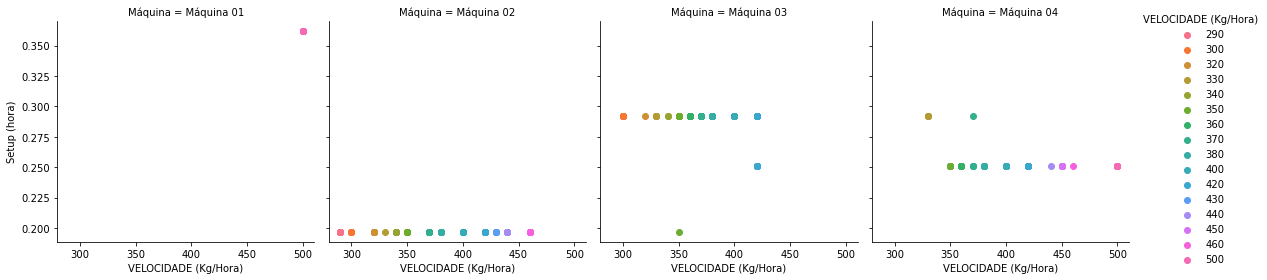

In [19]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
g = sns.FacetGrid(df, hue="VELOCIDADE (Kg/Hora)", col="Máquina", height=4)
g.map(qqplot, "VELOCIDADE (Kg/Hora)", "Setup (hora)")
g.add_legend()
plt.savefig("Imagens\Correção entre Máquina-velocidade-setup.png")

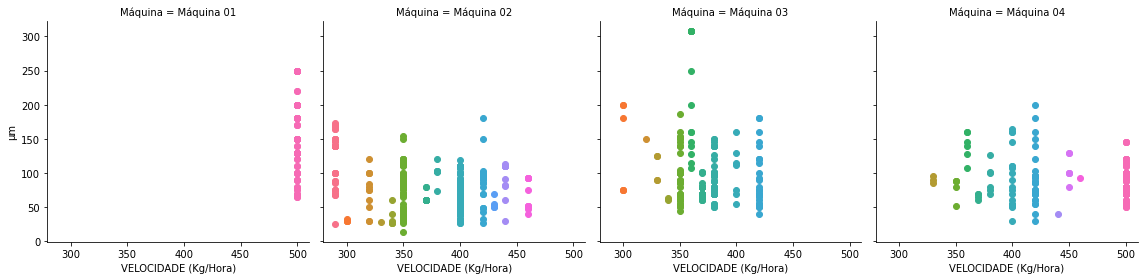

In [20]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)
    
g = sns.FacetGrid(df, hue="VELOCIDADE (Kg/Hora)", col="Máquina", height=4)
g.map(qqplot, "VELOCIDADE (Kg/Hora)", "µm")
#g.add_legend()
plt.savefig("Imagens\Correção entre Máquina-velocidade-espessura.png")

In [21]:
plt.figure(figsize=(12,6))

sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Máquina", y="µm", hue="FILME")
ax.set(ylabel="Espessura")
ax.set(xlabel="Máquina")

plt.legend()
plt.savefig("Imagens\Correlação entre Máquina-espessura-Material.png")

AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 864x432 with 0 Axes>

In [ ]:
g = sns.boxplot(x="Máquina", y="µm", hue="FILME", data=df, palette="deep")
g = sns.swarmplot(x="Máquina", y="µm", data=df, palette="deep", color=".25")
#plt.savefig("Imagens\Distribuição de setups.png")

In [23]:
plt.figure(figsize=(12,6))

sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="Setup (hora)", y="VELOCIDADE (Kg/Hora)", hue="FILME")
ax.set(ylabel="Velocidade")
ax.set(xlabel="Setup")

plt.legend()
plt.savefig("Correlação entre Velocidade-setup-Material.png")
plt.show()

AttributeError: module 'seaborn' has no attribute 'set_theme'

<Figure size 864x432 with 0 Axes>

# Mineração de dados

In [24]:
# identificação da menor taxa de erro
def buscarMenor(lst):
    i = float("inf")
    for nr in lst:
        if nr < i:
            i = nr
            c = lst.index(nr)
    return c + 1

In [25]:
def min(matriz):
    menor = matriz[0][0]
    for r in range(len(matriz)):
        nums = matriz[r]
        for n in nums:
            menor = n if menor > n else menor
            c = matriz.index(n)
            d = r
    return c, d

In [26]:
# Divisão dos dados
X = df.iloc[: , [0,1,2,3,4,5,6,8,9]].values
y = df['VELOCIDADE (Kg/Hora)']

In [27]:
X[1]

array([7, 'Material 01', 200, 1, 'Cor 01', 'Máquina 01', 'Centro 01',
       0.362, 3.25], dtype=object)

In [28]:
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])
X[:, 6] = labelencoder.fit_transform(X[:, 6])

In [29]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,4,6,7])],remainder='passthrough')
X = onehotencoder.fit_transform(X)

In [30]:
#y = pd.DataFrame(y)
normalizador = MinMaxScaler(feature_range= (0,1))
X = normalizador.fit_transform(X)
#y = normalizador.fit_transform(y)
#y = pd.DataFrame(y)

In [31]:
X = pd.DataFrame(X)

In [32]:
#Algoritmo de repetição para análise de métodos de classificação
def testeMaquina(metEsc):
    i = 0
    classi_analise = []
    #confu_analise_test = []
    #confu_analise_train = []
    # Laço de 10 repetições para retirar média dos testes
    for i in range (0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        #scaler = StandardScaler()
        #X_train_pad = scaler.fit_transform(X_train)
        #X_test_pad = scaler.fit_transform(X_test)
        logmodel = metEsc
        logmodel.fit(X_train, y_train)
        #predição
        predictions = logmodel.predict(X_test)
        predictions2 = logmodel.predict(X_train)
        #imprimindo classificação
        classi_analise.append(accuracy_score(y_test,predictions))
        classi_analise.append(accuracy_score(y_train,predictions2))
        classi_analise.append(precision_score(y_test,predictions, average='weighted'))
        classi_analise.append(precision_score(y_train,predictions2, average='weighted'))
        classi_analise.append(f1_score(y_test,predictions, average='weighted'))
        classi_analise.append(f1_score(y_train,predictions2, average='weighted'))
        #confu_analise_test.append(confusion_matrix(y_test,predictions))
        #confu_analise_train.append(confusion_matrix(y_train,predictions2))
        
    i =+ 1
    
    # Reformulando os dados e remodelando
    classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (100, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
    #confu_analise_test = pd.DataFrame(data=np.reshape(confu_analise_test, (100, 1)), index=None, columns=None)
    #confu_analise_train = pd.DataFrame(data=np.reshape(confu_analise_train, (100, 256)), index=None, columns=None)
    
    # Exportando dados para análise
    classi_analise.to_csv('Relatorio/Classificacao/classification_report_{}.csv'.format(str(metEsc)), index=False)
    #confu_analise_test.to_csv('Relatorio/PCA/confusion_matrix_test_{}.csv'.format(str(metEsc)), index=False)
    #confu_analise_train.to_csv('Relatorio/PCA/confusion_matrix_train{}.csv'.format(str(metEsc)), index=False)
    
    # reset dos valores
    classi_analise = []
    #confu_analise_test = []
    #confu_analise_train = []

## Técnicas de Classificação

Naive Bayes

In [33]:
#Importando o método de RL
from sklearn.naive_bayes import BernoulliNB

In [34]:
metEsc = BernoulliNB()
testeMaquina(metEsc)

Regressão Logistica

In [35]:
#Importando o método de RL
from sklearn.linear_model import LogisticRegression

In [36]:
metEsc = LogisticRegression()
testeMaquina(metEsc)

KNN

In [37]:
#Importando o método KNN
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(1,k+1):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  40 
 n_neighbors:  1


In [39]:
#sem definição de número de visinhos
metEsc = KNeighborsClassifier()
testeMaquina(metEsc)

i = 0
classi_analise = []
#confu_analise_test = []
#confu_analise_train = []
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    #predição
    predictions = knn.predict(X_test)
    predictions2 = knn.predict(X_train)
    #imprimindo classificação
    classi_analise.append(accuracy_score(y_test,predictions))
    classi_analise.append(accuracy_score(y_train,predictions2))
    classi_analise.append(precision_score(y_test,predictions, average='weighted'))
    classi_analise.append(precision_score(y_train,predictions2, average='weighted'))
    classi_analise.append(f1_score(y_test,predictions, average='weighted'))
    classi_analise.append(f1_score(y_train,predictions2, average='weighted'))
        
i =+ 1
    
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (100, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
# Exportando dados para análise
classi_analise.to_csv('Relatorio/Classificacao/classification_report_KNeighborsClassifier(n_neighbors=1).csv'.format(str(metEsc)), index=False)
    
# reset dos valores
classi_analise = []

SVM

In [ ]:
#importando biblioteca
from sklearn.svm import SVC

In [ ]:
metEsc = SVC()
testeMaquina(metEsc)

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#scaler = StandardScaler()
#X_train_pad = scaler.fit_transform(X_train)
#X_test_pad = scaler.fit_transform(X_test)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_
c = grid.best_params_['C']
gamma = grid.best_params_['gamma']
kernel = grid.best_params_['kernel']

In [ ]:
grid.best_estimator_

In [ ]:
metEsc = SVC(C = c, gamma = gamma, kernel = kernel)
testeMaquina(metEsc)

Árvore de Classificação

In [40]:
#importando biblioteca
from sklearn.tree import DecisionTreeClassifier

In [41]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(1,k+1):
        dectree = DecisionTreeClassifier(max_depth=i)
        dectree.fit(X_train, y_train)
        pred = dectree.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  56 
 n_neighbors:  10


In [42]:
#sem definição de profunidade dos nós
metEsc = DecisionTreeClassifier()
testeMaquina(metEsc)

i = 0
classi_analise = []
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    treeClas = DecisionTreeClassifier(max_depth=11)
    treeClas.fit(X_train, y_train)
    #predição
    predictions = treeClas.predict(X_test)
    predictions2 = treeClas.predict(X_train)
    #imprimindo classificação
    classi_analise.append(accuracy_score(y_test,predictions))
    classi_analise.append(accuracy_score(y_train,predictions2))
    classi_analise.append(precision_score(y_test,predictions, average='weighted'))
    classi_analise.append(precision_score(y_train,predictions2, average='weighted'))
    classi_analise.append(f1_score(y_test,predictions, average='weighted'))
    classi_analise.append(f1_score(y_train,predictions2, average='weighted'))
        
i =+ 1
    
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (100, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
# Exportando dados para análise
classi_analise.to_csv('Relatorio/Classificacao/classification_report_DecisionTreeClassifier(max_depth=11).csv'.format(str(metEsc)), index=False)
    
# reset dos valores
classi_analise = []

Random Forest

In [ ]:
#importando biblioteca
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(10,310,10):
        randfor = RandomForestClassifier(n_estimators=i)
        randfor.fit(X_train, y_train)
        pred = randfor.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

In [ ]:
#sem definição de profunidade dos nós
metEsc = RandomForestClassifier()
testeMaquina(metEsc)

i = 0
classi_analise = []
#confu_analise_test = []
#confu_analise_train = []
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    randFore = RandomForestClassifier(n_estimators=200)
    randFore.fit(X_train, y_train)
    #predição
    predictions = randFore.predict(X_test)
    predictions2 = randFore.predict(X_train)
    #imprimindo classificação
    classi_analise.append(accuracy_score(y_test,predictions))
    classi_analise.append(accuracy_score(y_train,predictions2))
    classi_analise.append(precision_score(y_test,predictions, average='weighted'))
    classi_analise.append(precision_score(y_train,predictions2, average='weighted'))
    classi_analise.append(f1_score(y_test,predictions, average='weighted'))
    classi_analise.append(f1_score(y_train,predictions2, average='weighted'))
        
i =+ 1
    
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (100, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
# Exportando dados para análise
classi_analise.to_csv('Relatorio/Classificacao/classification_report_RandomForestClassifier(n_estimators=200).csv'.format(str(metEsc)), index=False)
    
# reset dos valores
classi_analise = []

ANN

In [ ]:
#importando biblioteca
from sklearn.neural_network import MLPClassifier

In [ ]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(2000,32000,1000):
        ann = MLPClassifier(max_iter=i)
        ann.fit(X_train, y_train)
        pred = ann.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

In [ ]:
#sem definição de profunidade dos nós
metEsc = MLPClassifier()
testeMaquina(metEsc)

i = 0
classi_analise = []
#confu_analise_test = []
#confu_analise_train = []
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    ann = MLPClassifier(max_iter=16000)
    ann.fit(X_train, y_train)
    #predição
    predictions = ann.predict(X_test)
    predictions2 = ann.predict(X_train)
    #imprimindo classificação
    classi_analise.append(accuracy_score(y_test,predictions))
    classi_analise.append(accuracy_score(y_train,predictions2))
    classi_analise.append(precision_score(y_test,predictions, average='weighted'))
    classi_analise.append(precision_score(y_train,predictions2, average='weighted'))
    classi_analise.append(f1_score(y_test,predictions, average='weighted'))
    classi_analise.append(f1_score(y_train,predictions2, average='weighted'))
        
i =+ 1
    
# Reformulando os dados e remodelando
classi_analise = pd.DataFrame(data=np.reshape(classi_analise, (100, 6)), index=None,
                                  columns=['Acuracia_Teste', 'Acuracia_Treino', 'Precisao_Teste',
                                           'Precisao_Treino','F1_Teste', 'F1_Treino'])
# Exportando dados para análise
classi_analise.to_csv('Relatorio/Classificacao/classification_report_MLPClassifier(max_iter=16000).csv'.format(str(metEsc)), index=False)
    
# reset dos valores
classi_analise = []

## Técnicas de Regressão

In [33]:
#Algoritmo de repetição para análise de métodos de classificação
def testeMaquinaReg(metEsc):
    i = 0
    regress_analise = []
    predi_teste=[]
    predi_treino=[]
    y_teste=[]
    y_treino=[]
    # Laço de 10 repetições para retirar média dos testes
    for i in range (0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        #scaler = StandardScaler()
        #X_train_pad = scaler.fit_transform(X_train)
        #X_test_pad = scaler.fit_transform(X_test)
        logmodel = metEsc
        logmodel.fit(X_train, y_train)
        score = logmodel.score(X_train, y_train)
        #predição
        predictions = logmodel.predict(X_test)
        predictions2 = logmodel.predict(X_train)
        
        #imprimindo classificação
        predi_teste.append(predictions)
        predi_treino.append(predictions2)
        y_test = pd.DataFrame(data=y_test)
        y_teste.append(y_test)
        y_train = pd.DataFrame(data=y_train)
        y_treino.append(y_train)
        regress_analise.append(logmodel.score(X_test, y_test))
        regress_analise.append(mean_absolute_error(y_test,predictions))
        regress_analise.append(mean_absolute_error(y_train,predictions2))
        regress_analise.append(mean_squared_error(y_test,predictions))
        regress_analise.append(mean_squared_error(y_train,predictions2))
        regress_analise.append(r2_score(y_test,predictions))
        regress_analise.append(r2_score(y_train,predictions2))
        regress_analise.append(mean_absolute_percentage_error(y_test,predictions))
        regress_analise.append(mean_absolute_percentage_error(y_train,predictions2))
        
    i =+ 1
    
    # Reformulando os dados e remodelando
    regress_analise = pd.DataFrame(data=np.reshape(regress_analise, (100, 9)), index=None,
                                  columns=['Score', 'MAE_Teste', 'MAE_Treino', 'MSE_Teste', 'MSE_Treino', 'R2_Teste', 'R2_Treino', 'MAPE_Teste', 'MAPE_Treino'])
    predi_teste = pd.DataFrame(data=predi_teste)
    predi_treino = pd.DataFrame(data=predi_treino)
    y_teste = pd.DataFrame(data=np.reshape(y_teste, (100, 227)), index=None)
    y_treino = pd.DataFrame(data=np.reshape(y_treino, (100, 529)), index=None)
    
    # Exportando dados para análise
    regress_analise.to_csv('Relatorio/Regressao/regression_report_{}.csv'.format(str(metEsc)), index=False)
    predi_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_{}_predicaoteste.csv'.format(str(metEsc)), index=False)
    predi_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_{}_predicaotreino.csv'.format(str(metEsc)), index=False)
    y_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_{}_yteste.csv'.format(str(metEsc)), index=False)
    y_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_{}_ytreino.csv'.format(str(metEsc)), index=False)
       
    # reset dos valores
    regress_analise = []
    predi_teste=[]
    predi_treino=[]
    y_teste=[]
    y_treino=[]

SVR

In [34]:
from sklearn.svm import SVR
metEsc = SVR()
testeMaquinaReg(metEsc)

In [35]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [36]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train_pad = scaler.fit_transform(X_train)
X_test_pad = scaler.fit_transform(X_test)
grid.fit(X_train_pad,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.012 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.015 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.012 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.031 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.036 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.032 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.035 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.034 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.023 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.705 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.756 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
grid.best_params_
c = grid.best_params_['C']
gamma = grid.best_params_['gamma']
kernel = grid.best_params_['kernel']

In [39]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

In [40]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
650,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.064626,0.0,0.333333,0.008662
734,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.241497,0.0,0.333333,1.000000
404,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.054422,0.0,0.333333,0.008662
79,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.564626,1.0,0.000000,0.053898
422,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.666667,0.428571,0.0,0.666667,0.078922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.000000,0.190476,1.0,1.000000,0.078922
458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.666667,0.156463,1.0,0.666667,0.000000
627,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.666667,0.394558,1.0,0.000000,0.053898
155,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,0.190476,1.0,0.333333,0.008662


In [41]:
metEsc = SVR(C = c, gamma = gamma, kernel = kernel)
testeMaquinaReg(metEsc)

KNN

In [42]:
from sklearn.neighbors import KNeighborsRegressor
metEsc = KNeighborsRegressor()
testeMaquinaReg(metEsc)

In [43]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(1,k+1):
        knn = KNeighborsRegressor(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  40 
 n_neighbors:  1


In [44]:
i = 0
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=1)
    knn.fit(X_train, y_train)
    score = knn.score(X_train, y_train)
    #predição
    predictions = knn.predict(X_test)
    predictions2 = knn.predict(X_train)

    #imprimindo classificação
    predi_teste.append(predictions)
    predi_treino.append(predictions2)
    y_test = pd.DataFrame(data=y_test)
    y_teste.append(y_test)
    y_train = pd.DataFrame(data=y_train)
    y_treino.append(y_train)
    regress_analise.append(knn.score(X_test, y_test))
    regress_analise.append(mean_absolute_error(y_test,predictions))
    regress_analise.append(mean_absolute_error(y_train,predictions2))
    regress_analise.append(mean_squared_error(y_test,predictions))
    regress_analise.append(mean_squared_error(y_train,predictions2))
    regress_analise.append(r2_score(y_test,predictions))
    regress_analise.append(r2_score(y_train,predictions2))
    regress_analise.append(mean_absolute_percentage_error(y_test,predictions))
    regress_analise.append(mean_absolute_percentage_error(y_train,predictions2))

i =+ 1

# Reformulando os dados e remodelando
regress_analise = pd.DataFrame(data=np.reshape(regress_analise, (100, 9)), index=None,
                              columns=['Score', 'MAE_Teste', 'MAE_Treino', 'MSE_Teste', 'MSE_Treino', 'R2_Teste', 'R2_Treino', 'MAPE_Teste', 'MAPE_Treino'])
predi_teste = pd.DataFrame(data=predi_teste)
predi_treino = pd.DataFrame(data=predi_treino)
y_teste = pd.DataFrame(data=np.reshape(y_teste, (100, 227)), index=None)
y_treino = pd.DataFrame(data=np.reshape(y_treino, (100, 529)), index=None)

# Exportando dados para análise
regress_analise.to_csv('Relatorio/Regressao/regression_report_KNeighborsRegressor(n_neighbors=1).csv'.format(str(metEsc)), index=False)
predi_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_KNeighborsRegressor(n_neighbors=1)_predicaoteste.csv'.format(str(metEsc)), index=False)
predi_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_KNeighborsRegressor(n_neighbors=1)_predicaotreino.csv'.format(str(metEsc)), index=False)
y_test.to_csv('Relatorio/Regressao/Avaliacao/regression_report_KNeighborsRegressor(n_neighbors=1)_yteste.csv'.format(str(metEsc)), index=False)
y_train.to_csv('Relatorio/Regressao/Avaliacao/regression_report_KNeighborsRegressor(n_neighbors=1)_ytreino.csv'.format(str(metEsc)), index=False)

# reset dos valores
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]

Árvore de Decisão

In [45]:
from sklearn.tree import DecisionTreeRegressor
metEsc = DecisionTreeRegressor()
testeMaquinaReg(metEsc)

In [46]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(1,k+1):
        arvReg = DecisionTreeRegressor(max_depth=i)
        arvReg.fit(X_train, y_train)
        pred = arvReg.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  68 
 n_neighbors:  21


In [54]:
i = 0
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=68)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    arvReg = DecisionTreeRegressor(max_depth=21)
    arvReg.fit(X_train, y_train)
    score = arvReg.score(X_train, y_train)
    #predição
    predictions = arvReg.predict(X_test)
    predictions2 = arvReg.predict(X_train)

    #imprimindo classificação
    predi_teste.append(predictions)
    predi_treino.append(predictions2)
    y_test = pd.DataFrame(data=y_test)
    y_teste.append(y_test)
    y_train = pd.DataFrame(data=y_train)
    y_treino.append(y_train)
    regress_analise.append(arvReg.score(X_test, y_test))
    regress_analise.append(mean_absolute_error(y_test,predictions))
    regress_analise.append(mean_absolute_error(y_train,predictions2))
    regress_analise.append(mean_squared_error(y_test,predictions))
    regress_analise.append(mean_squared_error(y_train,predictions2))
    regress_analise.append(r2_score(y_test,predictions))
    regress_analise.append(r2_score(y_train,predictions2))
    regress_analise.append(mean_absolute_percentage_error(y_test,predictions))
    regress_analise.append(mean_absolute_percentage_error(y_train,predictions2))

i =+ 1

# Reformulando os dados e remodelando
regress_analise = pd.DataFrame(data=np.reshape(regress_analise, (100, 9)), index=None,
                              columns=['Score', 'MAE_Teste', 'MAE_Treino', 'MSE_Teste', 'MSE_Treino', 'R2_Teste', 'R2_Treino', 'MAPE_Teste', 'MAPE_Treino'])
predi_teste = pd.DataFrame(data=predi_teste)
predi_treino = pd.DataFrame(data=predi_treino)
y_teste = pd.DataFrame(data=np.reshape(y_teste, (100, 227)), index=None)
y_treino = pd.DataFrame(data=np.reshape(y_treino, (100, 529)), index=None)

# Exportando dados para análise
regress_analise.to_csv('Relatorio/Regressao/regression_report_DecisionTreeRegressor(max_depth=21).csv'.format(str(metEsc)), index=False)
predi_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_DecisionTreeRegressor(max_depth=21)_predicaoteste.csv'.format(str(metEsc)), index=False)
predi_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_DecisionTreeRegressor(max_depth=21)_predicaotreino.csv'.format(str(metEsc)), index=False)
y_test.to_csv('Relatorio/Regressao/Avaliacao/regression_report_DecisionTreeRegressor(max_depth=21)_yteste.csv'.format(str(metEsc)), index=False)
y_train.to_csv('Relatorio/Regressao/Avaliacao/regression_report_DecisionTreeRegressor(max_depth=21)_ytreino.csv'.format(str(metEsc)), index=False)

# reset dos valores
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]

Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
metEsc = RandomForestRegressor()
testeMaquinaReg(metEsc)

In [49]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(10,310,10):
        randReg = RandomForestRegressor(n_estimators=i)
        randReg.fit(X_train, y_train)
        pred = randReg.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  12 
 n_neighbors:  1


In [50]:
i = 0
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    randReg = RandomForestRegressor(n_estimators=10)
    randReg.fit(X_train, y_train)
    score = randReg.score(X_train, y_train)
    #predição
    predictions = randReg.predict(X_test)
    predictions2 = randReg.predict(X_train)

    #imprimindo classificação
    predi_teste.append(predictions)
    predi_treino.append(predictions2)
    y_test = pd.DataFrame(data=y_test)
    y_teste.append(y_test)
    y_train = pd.DataFrame(data=y_train)
    y_treino.append(y_train)
    regress_analise.append(randReg.score(X_test, y_test))
    regress_analise.append(mean_absolute_error(y_test,predictions))
    regress_analise.append(mean_absolute_error(y_train,predictions2))
    regress_analise.append(mean_squared_error(y_test,predictions))
    regress_analise.append(mean_squared_error(y_train,predictions2))
    regress_analise.append(r2_score(y_test,predictions))
    regress_analise.append(r2_score(y_train,predictions2))
    regress_analise.append(mean_absolute_percentage_error(y_test,predictions))
    regress_analise.append(mean_absolute_percentage_error(y_train,predictions2))

i =+ 1

# Reformulando os dados e remodelando
regress_analise = pd.DataFrame(data=np.reshape(regress_analise, (100, 9)), index=None,
                              columns=['Score', 'MAE_Teste', 'MAE_Treino', 'MSE_Teste', 'MSE_Treino', 'R2_Teste', 'R2_Treino', 'MAPE_Teste', 'MAPE_Treino'])
predi_teste = pd.DataFrame(data=predi_teste)
predi_treino = pd.DataFrame(data=predi_treino)
y_teste = pd.DataFrame(data=np.reshape(y_teste, (100, 227)), index=None)
y_treino = pd.DataFrame(data=np.reshape(y_treino, (100, 529)), index=None)

# Exportando dados para análise
regress_analise.to_csv('Relatorio/Regressao/regression_report_RandomForestRegressor(n_estimators=10).csv'.format(str(metEsc)), index=False)
predi_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_RandomForestRegressor(n_estimators=10)_predicaoteste.csv'.format(str(metEsc)), index=False)
predi_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_RandomForestRegressor(n_estimators=10)_predicaotreino.csv'.format(str(metEsc)), index=False)
y_test.to_csv('Relatorio/Regressao/Avaliacao/regression_report_RandomForestRegressor(n_estimators=10)_yteste.csv'.format(str(metEsc)), index=False)
y_train.to_csv('Relatorio/Regressao/Avaliacao/regression_report_RandomForestRegressor(n_estimators=10)_ytreino.csv'.format(str(metEsc)), index=False)

# reset dos valores
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]

ANN

In [51]:
from sklearn.neural_network import MLPRegressor
metEsc = MLPRegressor()
testeMaquinaReg(metEsc)

In [52]:
#criação de conjunto vazio
error_rate = []

#Tamanho do laço for para testes
k = 30
t = 100

for j in range(1, t+1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=j)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    #criação de laço for, para definir melhor número de vizinhos
    for i in range(2000,20000,1000):
        annr = MLPRegressor(max_iter=i)
        annr.fit(X_train, y_train)
        pred = annr.predict(X_test)
        error_rate.append(np.mean(pred != y_test))

valor_menor = buscarMenor(error_rate)
print("random_state: ", int((valor_menor-1)/k), '\n', 'n_neighbors: ', ((valor_menor-1)%k)+1)
menor = ((valor_menor-1)%k)+1

random_state:  0 
 n_neighbors:  1


In [53]:
i = 0
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]
# Laço de 10 repetições para retirar média dos testes
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    #scaler = StandardScaler()
    #X_train_pad = scaler.fit_transform(X_train)
    #X_test_pad = scaler.fit_transform(X_test)
    annr = MLPRegressor(random_state=0, max_iter=2000)
    annr.fit(X_train, y_train)
    score = annr.score(X_train, y_train)
    #predição
    predictions = annr.predict(X_test)
    predictions2 = annr.predict(X_train)

    #imprimindo classificação
    predi_teste.append(predictions)
    predi_treino.append(predictions2)
    y_test = pd.DataFrame(data=y_test)
    y_teste.append(y_test)
    y_train = pd.DataFrame(data=y_train)
    y_treino.append(y_train)
    regress_analise.append(annr.score(X_test, y_test))
    regress_analise.append(mean_absolute_error(y_test,predictions))
    regress_analise.append(mean_absolute_error(y_train,predictions2))
    regress_analise.append(mean_squared_error(y_test,predictions))
    regress_analise.append(mean_squared_error(y_train,predictions2))
    regress_analise.append(r2_score(y_test,predictions))
    regress_analise.append(r2_score(y_train,predictions2))
    regress_analise.append(mean_absolute_percentage_error(y_test,predictions))
    regress_analise.append(mean_absolute_percentage_error(y_train,predictions2))

i =+ 1

# Reformulando os dados e remodelando
regress_analise = pd.DataFrame(data=np.reshape(regress_analise, (100, 9)), index=None,
                              columns=['Score', 'MAE_Teste', 'MAE_Treino', 'MSE_Teste', 'MSE_Treino', 'R2_Teste', 'R2_Treino', 'MAPE_Teste', 'MAPE_Treino'])
predi_teste = pd.DataFrame(data=predi_teste)
predi_treino = pd.DataFrame(data=predi_treino)
y_teste = pd.DataFrame(data=np.reshape(y_teste, (100, 227)), index=None)
y_treino = pd.DataFrame(data=np.reshape(y_treino, (100, 529)), index=None)

# Exportando dados para análise
regress_analise.to_csv('Relatorio/Regressao/regression_report_MLPRegressor(max_iter=2000).csv'.format(str(metEsc)), index=False)
predi_teste.to_csv('Relatorio/Regressao/Avaliacao/regression_report_MLPRegressor(max_iter=2000)_predicaoteste.csv'.format(str(metEsc)), index=False)
predi_treino.to_csv('Relatorio/Regressao/Avaliacao/regression_report_MLPRegressor(max_iter=2000)_predicaotreino.csv'.format(str(metEsc)), index=False)
y_test.to_csv('Relatorio/Regressao/Avaliacao/regression_report_MLPRegressor(max_iter=2000)_yteste.csv'.format(str(metEsc)), index=False)
y_train.to_csv('Relatorio/Regressao/Avaliacao/regression_report_MLPRegressor(max_iter=2000)_ytreino.csv'.format(str(metEsc)), index=False)

# reset dos valores
regress_analise = []
predi_teste=[]
predi_treino=[]
y_teste=[]
y_treino=[]